# TASK 01: STOCK MARKET ANALYSIS AND PREDICTION:-
## BY @CODTECH IT SOLUTION--->
**Analyze historical stock market data to identify trends, patterns, and correlations between
stock prices. Apply time series analysis techniques to predict future stock prices using
models like ARIMA or LSTM.**

## **This Project is Created By Shahrukh Khan (Data Analyst/Business Analyst)**
### *Please visit my GitHub account for more info--(https://github.com/Shahrukhkhan1580)*
### *Visit my Linkedin account for more details about me--(www.linkedin.com/in/shahrukhkhaan)*

# PROJECT SUMMARY: Stock Market Prediction Using ARIMA Model:
## Project Overview
**This project aims to develop a robust model for predicting stock market prices using the ARIMA (AutoRegressive Integrated Moving Average) model. The ARIMA model is widely used for time series forecasting due to its ability to handle different types of time-dependent structures. By leveraging historical stock market data, this project intends to forecast future stock prices, providing valuable insights for investors and financial analysts.**
## Objectives
* **Data Collection:** 
* **Data Preprocessing:** 
* **Exploratory Data Analysis (EDA):**
* **Model Development:**
* **Model Evaluation:**
* **Prediction:**
* **Results:**
* **Conclusion:**
* **Future Work:** 


## Data Collection

### Import The Required Libraries

In [31]:
import pandas as pd, numpy as np , matplotlib.pyplot as plt , seaborn as sns
import yfinance as yf 
import datetime as dt 
from datetime import date,timedelta 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX 
import plotly.express as px
import plotly.graph_objects as go 


### Define Dates to Fetch the Data

In [32]:
today=date.today()
d1=today.strftime("%Y-%m-%d")
end_date=d1
d2=date.today()-timedelta(days=365)
d2=d2.strftime("%Y-%m-%d")
start_date=d2
print("Your Data will be between these Dates :",start_date,end_date)     

Your Data will be between these Dates : 2023-06-24 2024-06-23


#### Define the Ticker

In [33]:
ticker='GOOGL'
df=yf.download(ticker,start=start_date,end=end_date,progress=False)# When running this code you get connected to internet

#### Read the Few Data

In [34]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-26,120.760002,122.000000,118.269997,118.339996,118.204330,33969900
2023-06-27,117.080002,119.080002,116.099998,118.330002,118.194351,39535900
2023-06-28,117.089996,120.389999,116.849998,120.180000,120.042229,27091400
2023-06-29,119.239998,120.059998,118.300003,119.099998,118.963463,24090900
2023-06-30,120.169998,121.080002,119.690002,119.699997,119.562775,29519700


## Data Preprocessing

* **Handle missing values and outliers to ensure data quality.**
* **Convert the data into a time series format suitable for ARIMA modeling.**

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-06-26 to 2024-06-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [36]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

#### Change the Date Index

In [37]:
df['Date']=df.index 
df.reset_index(drop=True,inplace=True)

In [38]:
# Change date position by mannual process you can do this by insert function
#df.insert(0,"Date",df.index,true)
df=df[['Date','Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

In [39]:
#Again Read the Data after change the Date Index.....
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-26,120.760002,122.000000,118.269997,118.339996,118.204330,33969900
1,2023-06-27,117.080002,119.080002,116.099998,118.330002,118.194351,39535900
2,2023-06-28,117.089996,120.389999,116.849998,120.180000,120.042229,27091400
3,2023-06-29,119.239998,120.059998,118.300003,119.099998,118.963463,24090900
4,2023-06-30,120.169998,121.080002,119.690002,119.699997,119.562775,29519700


#### Check the Null or Missing Values

In [40]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**There is No Null Values or Missing Values**

### Selcect the Necessary Column for further process of ARIMA Model 

In [41]:
df=df[['Date','Close']]
df.head()

,Date,Close
0,2023-06-26,118.339996
1,2023-06-27,118.330002
2,2023-06-28,120.180000
3,2023-06-29,119.099998
4,2023-06-30,119.699997


## Exploratory Data Analysis (EDA)

* **Plot the time series data to understand its characteristics (trend, seasonality, etc.)**
* **Use statistical tests to check for stationarity (e.g., Augmented Dickey-Fuller test)**

In [42]:
df.describe()

,Date,Close
count,250,250.000000
mean,2023-12-22 16:07:40.800000,142.565440
min,2023-06-26 00:00:00,116.449997
25%,2023-09-22 18:00:00,131.622501
50%,2023-12-20 12:00:00,138.049995
75%,2024-03-21 18:00:00,150.844997
max,2024-06-21 00:00:00,179.630005
std,NaN,15.949586


### Plot the graph to understand its characteristics

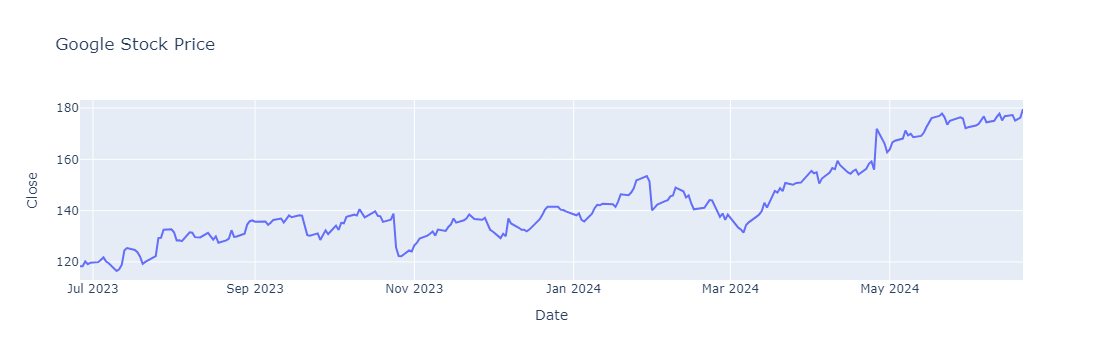

<Figure size 1000x600 with 0 Axes>

In [49]:
plt.figure(figsize=(10,6))
fig= px.line(df,x='Date',y='Close',title='Google Stock Price')

fig.show()

### Check for Stationarity (e.g., Augmented Dickey-Fuller test).

In [44]:
def check_stationarity(df): 
    result=adfuller(df)
    print('ADF Statistic: %f ' % result [0])
    print('p-value: %f' % result[1])
    if result[1]<=0.05: # 0.05 is 5% data that is my Alpha value.
        print("Reject the Null hypothesis . Data is Stationary")
    else: 
        print("Fail to Reject to Null hypothesis . Data is not Stationary")
check_stationarity(df['Close'])


ADF Statistic: -0.603959 
p-value: 0.870085
Fail to Reject to Null hypothesis . Data is not Stationary


### Decompose the Data to see the Trend ,Seasonality and Noise

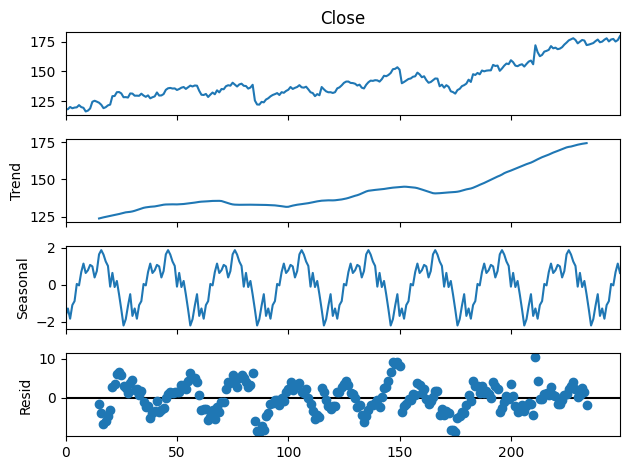

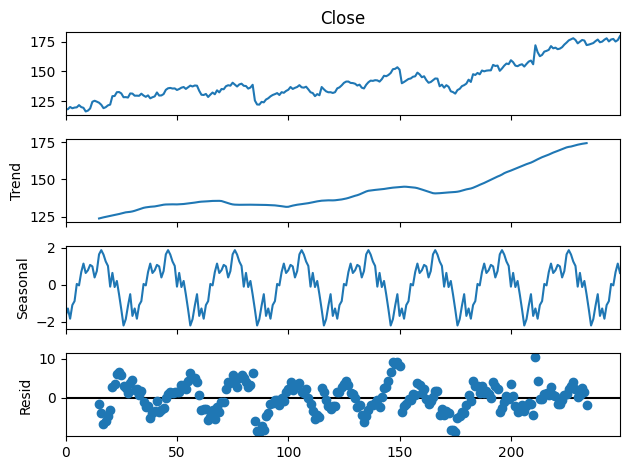

In [45]:
decompose=seasonal_decompose(df['Close'],model='additive',period=30)
decompose.plot()

## Model Development

* **Determine the order of the ARIMA model (p, d, q) using ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots.**
* **Fit the ARIMA model to the training data.**
* **Tune the model parameters to optimize performance.**

### Find the ACF (Autocorrelation Function) Plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

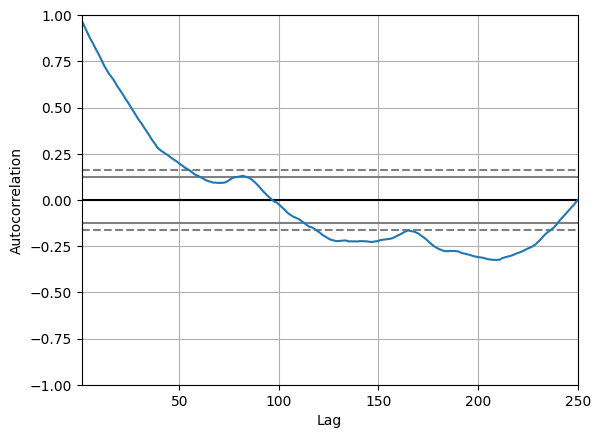

In [46]:
pd.plotting.autocorrelation_plot(df['Close'])

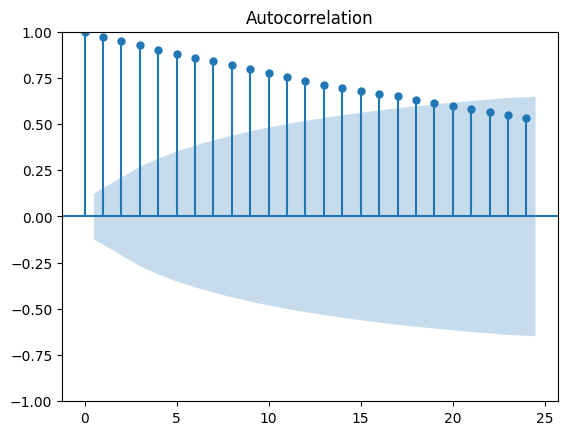

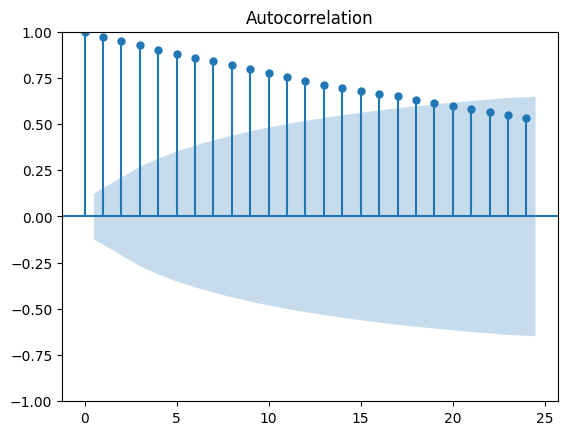

In [47]:
plot_acf(df['Close'],alpha=0.05)# Here we use the Alpha value that is 5%.

In [48]:
x_acf=pd.DataFrame(acf(df['Close']))
print(x_acf)

           0
0   1.000000
1   0.972245
2   0.948159
3   0.925551
4   0.902582
5   0.879373
6   0.859975
7   0.840276
8   0.818723
9   0.799253
10  0.778275
11  0.756683
12  0.732698
13  0.713580
14  0.695393
15  0.678941
16  0.665066
17  0.650280
18  0.631698
19  0.613570
20  0.598338
21  0.581903
22  0.565841
23  0.547368


## **Looking the values we find only 2 values which is greater than 95% so the value of P-value is 2.**

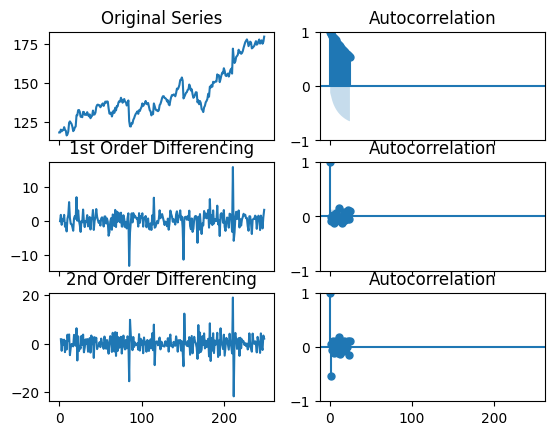

In [50]:
# original Series 
fig,axes=plt.subplots(3,2,sharex = True)
axes[0, 0].plot(df['Close']); axes[0,0].set_title('Original Series')
plot_acf(df['Close'],ax=axes[0,1])

# 1st Differencing
axes[1,0].plot(df['Close'].diff()); axes[1,0].set_title('1st Order Differencing')
plot_acf(df['Close'].diff().dropna(),ax=axes[1,1])

# 2nd Differencing 
axes[2,0].plot(df['Close'].diff().diff()); axes[2,0].set_title('2nd Order Differencing')
plot_acf(df['Close'].diff().diff().dropna(),ax=axes[2,1])

plt.show()

## **After Analysis this graph we're found there is no Maximum Differencing of 1st and 2nd order so we Use d=1.**

### Find the PACF (Partial Autocorrelation Function) plots.

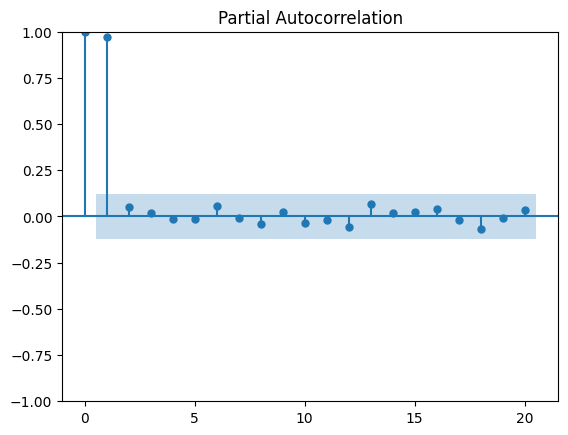

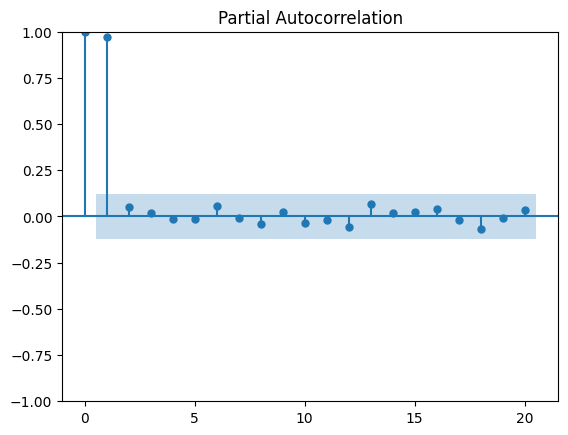

In [51]:
plot_pacf(df['Close'],lags=20,alpha=0.05)

## **There are only two values which is differ form each other so the value of Q-value is 2.**

### **Lets define the p, d, q = 2, 1, 2**

###  **Lets Run ARIMA  With PmdArima**

In [56]:
from pmdarima.arima import auto_arima
model=auto_arima(df['Close'],start_p=1,start_q=1,max_p=2,max_q=2,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,error_action='ignore',suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.07 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1294.344, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1201.447, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.05 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1291.739, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1197.287, Time=0.56 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.21 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.33 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1197.323, Time=0.22 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1198.774, Time=0.61 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=2.94 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1197.060, Time=0.41 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1201.214, Time=0.17 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=3.20 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, T

In [57]:
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  250
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -594.530
Date:                             Sun, 23 Jun 2024   AIC                           1197.060
Time:                                     14:20:11   BIC                           1210.932
Sample:                                          0   HQIC                          1202.651
                                             - 250                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1039      0.065     -1.598      0.110      -0.231       0.023
ar.S.L12      -0.6719      

#### **Remember that Arima is equivalent to Sarimax**

### Observation: 
* **This model summary shows thats value takes the ARIMA model.**
* **Here (2,1,0) is seasonal model.**
* **Best model = (1,1,1)**

### **Find Best Arima model by Auto_Arima without p,d,q value**

In [58]:
# Import the necessary libraray
from pmdarima.arima import auto_arima
model=auto_arima(df['Close'],seasonal=True,suppress_warnings=True)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -577.832
Date:                Sun, 23 Jun 2024   AIC                           1163.664
Time:                        14:30:01   BIC                           1177.734
Sample:                             0   HQIC                          1169.327
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0392      0.033      1.184      0.236      -0.026       0.104
ar.L1          0.8368      0.132      6.344      0.000       0.578       1.095
ma.L1         -0.9127      0.099     -9.203      0.0

### **Stats Model And ARIMA**

In [60]:
#import required libraries
from statsmodels.tsa.arima.model import ARIMA
import warnings
p,d,q=2,1,2
model=ARIMA(df['Close'],order=(p,d,q))
model=model.fit()
print(model.summary())

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -580.122
Date:                Sun, 23 Jun 2024   AIC                           1170.243
Time:                        14:36:32   BIC                           1187.830
Sample:                             0   HQIC                          1177.322
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1054      1.044      0.101      0.920      -1.941       2.152
ar.L2          0.5240      0.638      0.821      0.412      -0.727       1.775
ma.L1         -0.1908      1.047     -0.182      0.8

### Applyint the prediction and plot the Forecast

250    179.370504
251    179.303916
252    179.160910
253    179.110944
254    179.030739
255    178.996102
256    178.950421
257    178.927456
258    178.901097
259    178.886285
260    178.870911
261    178.861528
262    178.852483
263    178.846613
264    178.841254
265    178.837614
266    178.834422
267    178.832177
268    178.830268
269    178.828891
270    178.827745
271    178.826903
272    178.826214
273    178.825699
274    178.825284
275    178.824971
276    178.824720
277    178.824530
278    178.824378
279    178.824263
280    178.824171
Name: predicted_mean, dtype: float64


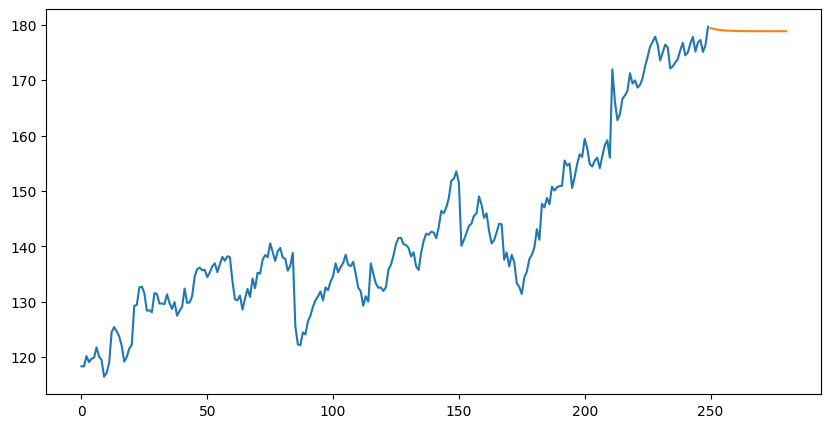

In [65]:
# Lets Predict the next 30 days .......
forecast=model.predict(len(df['Close']),len(df['Close'])+30)
print(forecast)

# Plot the forecast of 30 days.........
plt.figure(figsize=(10,5))
plt.plot(df['Close'],label='Actual')
plt.plot(forecast,label='forecast')
plt.show()

# **We put the ARIMA MODEL but we did not get the Right Prediction Value So we're Going to use SARIMA MODEL.**

## **Lets Run the SARIMA model**
#### **This is the Adavanced model in compare to pmdarima**

In [66]:
# Import the Required Libraries...
import statsmodels.api as sm 
import warnings
p, d, q = 2,1,2
model= sm.tsa.statespace.SARIMAX(df['Close'],
                                 order=(p,d,q),
                                 seasonal_order=(p,d,q,12))
model=model.fit()
print(model.summary())


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -566.515
Date:                            Sun, 23 Jun 2024   AIC                           1151.030
Time:                                    15:02:20   BIC                           1182.243
Sample:                                         0   HQIC                          1163.611
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1368      1.279      0.107      0.915      -2.369       2.643
ar.L2          0.5465      0.938   

# **Prediction**

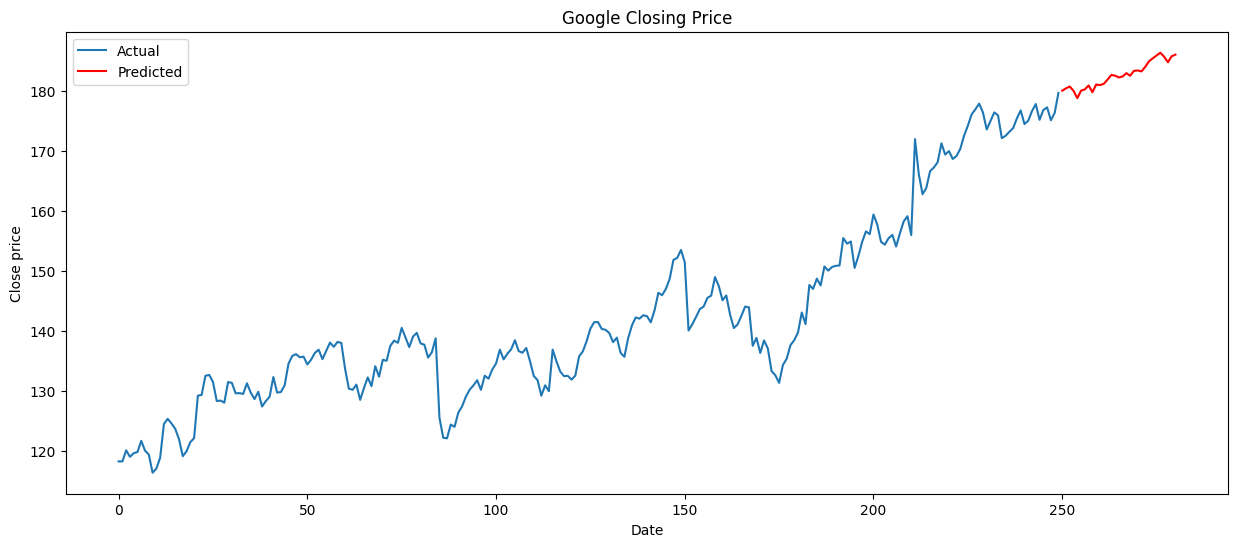

In [69]:
pridictions=model.predict(start=len(df['Close']),end=len(df['Close'])+30)# 3o is no. of day for prediction

# Plot the prediction
plt.figure(figsize=(15,6))
plt.plot(df['Close'],label='Actual')
plt.plot(pridictions,color='red',label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.title('Google Closing Price')

# change legend location 
plt.legend(loc='upper left')
plt.show()

## **This is the best prediction of my values with the SARIMA model.**

## **Results**
* **The ARIMA model(SARIMA model) successfully captured the trends and patterns in the historical stock data.**
* **The model's predictions were evaluated and found to be reasonably accurate, with error metrics indicating good performance.**
* **Visualizations of the predicted vs. actual stock prices provided clear insights into the model's forecasting capabilities.**

## **Conclusion**
**The ARIMA model proved to be a valuable tool for stock price prediction, offering a systematic approach to time series forecasting. By accurately modeling historical data, the ARIMA model can provide investors and analysts with actionable insights into future stock price movements. Future work could explore the integration of other time series models or hybrid approaches to further enhance prediction accuracy.**

## **Future Work** 
* **Incorporate Exogenous Variables:** Include other financial indicators (e.g., interest rates, economic indicators) to improve prediction accuracy.
* **Compare with Other Models:** Benchmark ARIMA performance against other time series models like SARIMA, Prophet, or machine learning-based approaches.
* **Real-Time Prediction:** Develop a real-time prediction system to update forecasts as new data becomes available.
* **Automated Model Selection:** Implement automated techniques for selecting the best model parameters to streamline the modeling process.

# **PROJECT CREATED by SHAHRUKH KHAN (DATA ANALYST/BUSINESS ANALYST)**
### *Please visit my GitHub account for more info--(https://github.com/Shahrukhkhan1580)*
### *Visit my Linkedin account for more details about me--(www.linkedin.com/in/shahrukhkhaan)*